In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv",parse_dates=["posted","scraped"])

df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)


df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False


In [3]:
import nltk
nltk.download('stopwords')


import json
import glob


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import spacy
# from nltk import stopwords
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import pyLDAvis
import pyLDAvis.gensim

import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = df.title.tolist()

data[:5]

['Caturday morning TV 😺',
 'Round loaf!',
 'Taken over fall wreath',
 'My kitten, Topaz!',
 'My Tom is not impressed having to wait for the door to open!']

In [5]:
def lemmatization(texts, allowed_postags=["NOUN","ADJ","VERB","ADV"]):
    
    nlp = spacy.load("en_core_web_sm",disable=["parser","ner"])
    
    texts_out = []
    
    for text in texts:
        
        doc = nlp(text)
        new_text = []
        
        for token in doc:
            
            if token.pos_ in allowed_postags:
                
                new_text.append(token.lemma_)
                
        final = " ".join(new_text)
        
        texts_out.append(final)

    return texts_out

In [6]:
new_data = lemmatization(data)

In [7]:
def gen_word(texts):
    
    final = []
    
    for text in texts:
        
        new = gensim.utils.simple_preprocess(text,deacc=True)
        final.append(new)
        
    return (final)

In [8]:
data_words = gen_word(new_data)

In [9]:
bigram_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)


def make_bigrams(texts):

    return [bigram[doc] for doc in texts]


def make_trigram(texts):

    return [trigram[bigram[doc]] for doc in texts]

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigram(data_bigrams)


print(data_bigrams_trigrams[0][0:10])

['caturday', 'morning', 'tv']


In [10]:
df["trigrams"] = data_bigrams_trigrams

In [11]:
df.subreddit.unique().tolist()

['catpictures',
 'WhiteCats',
 'CalicoKittys',
 'TabbyCats',
 'TortoiseShellCats',
 'KittyTailWrap',
 'Abyssinians',
 'bengalcats',
 'BombayCat',
 'birmans',
 'britishshorthair',
 'mainecoons',
 'russianblue',
 'Siamesecats',
 'sphynx',
 'SphynxCats',
 'dogpictures',
 'PuppySmiles',
 'BoxerDogs',
 'Keeshond',
 'Havanese',
 'basset',
 'bassethounds',
 'EnglishSetter',
 'MiniatureSchnauzer',
 'Chihuahua',
 'greatpyrenees',
 'germanshorthairs',
 'beagle',
 'beagles',
 'Staffiebullterriers',
 'NewfoundlandDogs',
 'englishcockerspaniel',
 'Pomeranians',
 'pomeranian',
 'pitbulls',
 'Wheatens',
 'JapaneseChin',
 'samoyeds',
 'scottishterriers',
 'ShibaInu',
 'pugs',
 'pug',
 'SaintBernards',
 'AmericanBully',
 'YorkshireTerrier',
 'graycats',
 'Leonberger',
 'egyptianmau',
 'ragdollcats',
 'persiancat',
 'blackcats']

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
options = ["cats","dogs"]


for option in options:
    
    if option=="All":
        
        text = " ".join([sentence for sentence in df.trigrams.apply(lambda x: " ".join(x))])
        
    elif option in ["cats","dogs"]:
        
        text = " ".join([sentence for sentence in df[df.category==option].trigrams.apply(lambda x: " ".join(x))])
        
    else:
        
        text = " ".join([sentence for sentence in df[df.subreddit==option].trigrams.apply(lambda x: " ".join(x))])
        

    wordcloud = WordCloud(max_words=50,width=400, height=200).generate(text)

    wordcloud.to_file(f'wordclouds/{option}.png')
    


## Removing Common Words

In [14]:
from gensim.models import TfidfModel

In [15]:
id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]



tfidf = TfidfModel(corpus, id2word=id2word)

THRESHOLD = 0.25
words = []
words_missing_in_tfidf = []



for i in range(len(corpus)):
    
    bow = corpus[i]
    
    low_value_words = []
    tfidf_ids = [idx for idx, value in tfidf[bow]]
    bow_ids = [idx for idx,value in bow]
    low_value_words = [idx for idx,value in tfidf[bow] if value < THRESHOLD]
    drops = low_value_words + words_missing_in_tfidf
    
    for item in drops:
        words.append(id2word[item])
        
    words_missing_in_tfidf = [idx for idx in bow_ids if idx not in tfidf_ids]
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    
    
    corpus[i] = new_bow
    
    
    

In [16]:
df["trigrams_clipped"] = [[id2word[t[0]] for t in line] for line in corpus]

In [26]:
options = ["cats","dogs"] 
keywords = set()

for option in options:
    
    if option=="All":
        
        text = " ".join([sentence for sentence in df.trigrams_clipped.apply(lambda x: " ".join(x))])
        
    elif option in ["cats","dogs"]:
        
        text = " ".join([sentence for sentence in df[df.category==option].trigrams_clipped.apply(lambda x: " ".join(x))])
        
    else:
        
        text = " ".join([sentence for sentence in df[df.subreddit==option].trigrams_clipped.apply(lambda x: " ".join(x))])
        

    wordcloud = WordCloud(max_words=50).generate(text)

    wordcloud.to_file(f'wordclouds/{option}_clipped.png')
    keywords = keywords.union(set(wordcloud.words_))

keywords.remove("cat")
keywords.remove("dog")
    
keywords = list(keywords)

In [28]:
for kw in keywords:
    
    df[f'keyword_{kw}'] = df.title.str.lower().str.contains(kw)

In [29]:
df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,...,keyword_sweet,keyword_happy,keyword_big,keyword_baby,keyword_say,keyword_day,keyword_enjoy,keyword_kitten,keyword_smile,keyword_cute
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,...,False,False,False,False,False,True,False,False,False,False
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,...,False,False,False,False,False,False,False,False,False,False
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,...,False,False,False,False,False,False,False,False,False,False
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,...,False,False,False,False,False,False,False,True,False,False
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,...,False,False,False,False,False,False,False,False,False,False


In [31]:
kwdf = pd.DataFrame({"keywords":keywords})

kwdf.to_csv("keywords.csv",index=False)

In [35]:
df[[col for col in df.columns if "keyword" in col]].mean().sort_values()*100

keyword_old year    0.001712
keyword_bengal      0.371499
keyword_find        0.510169
keyword_kitten      0.537561
keyword_kitty       0.587208
                      ...   
keyword_little      4.570979
keyword_boy         4.790112
keyword_love        5.300281
keyword_day         9.439841
keyword_go          9.636718
Length: 62, dtype: float64

In [52]:
test = df.groupby(["keyword_make"],as_index=False).agg({"target":"mean"})

test.target.std()

0.03991979080590685

In [53]:
for kw in kwdf.keywords:
    
    print(kw,df.groupby(["keyword_make"],as_index=False).agg({"target":"mean"}).target.std())

make 0.03991979080590685
always 0.03991979080590685
look 0.03991979080590685
find 0.03991979080590685
month 0.03991979080590685
morning 0.03991979080590685
sit 0.03991979080590685
sleep 0.03991979080590685
bed 0.03991979080590685
ready 0.03991979080590685
good 0.03991979080590685
beagle 0.03991979080590685
still 0.03991979080590685
handsome 0.03991979080590685
love 0.03991979080590685
first 0.03991979080590685
friend 0.03991979080590685
work 0.03991979080590685
snow 0.03991979080590685
nap 0.03991979080590685
see 0.03991979080590685
take 0.03991979080590685
week 0.03991979080590685
boy 0.03991979080590685
name 0.03991979080590685
beautiful 0.03991979080590685
puppy 0.03991979080590685
pug 0.03991979080590685
cuddle 0.03991979080590685
pup 0.03991979080590685
new 0.03991979080590685
eye 0.03991979080590685
go 0.03991979080590685
now 0.03991979080590685
face 0.03991979080590685
walk 0.03991979080590685
watch 0.03991979080590685
girl 0.03991979080590685
meet 0.03991979080590685
know 0.039

In [41]:
df["target"] = np.log(df.upvotes+1)

<AxesSubplot:xlabel='keyword_kitty', ylabel='target'>

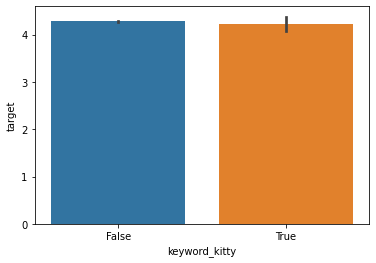

In [42]:
sns.barplot(data=df,x="keyword_kitty",y="target")

<AxesSubplot:xlabel='keyword_kitten', ylabel='target'>

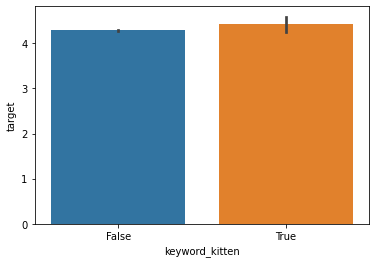

In [44]:
sns.barplot(data=df,x="keyword_kitten",y="target")

<AxesSubplot:xlabel='keyword_puppy', ylabel='target'>

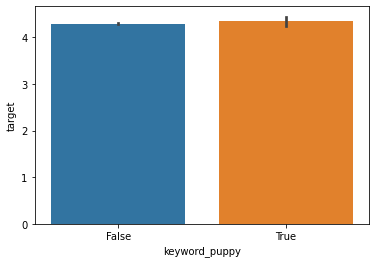

In [45]:
sns.barplot(data=df,x="keyword_puppy",y="target")